# Tractography: from diffusion-weighted MRI to brain anatomical connectivity

Pauline Roca, Sainte Anne

UE 3.11b – Advanced NeuroImaging Data
Modeling and Analysis <a id='tableofcontents'></a>

### <a href='#keypoints'>1. Diffusion Theory: key points</a>
#### <a href='#Whydowedodiffusion'>a. Why do we do diffusion MRI ?</a>

#### <a href='#diffusionprinciple'>b. Diffusion principle</a>

#### <a href='#diffusioninthebrain'>c. Diffusion in the brain</a>

#### <a href='#diffusionmrsignal'>d. Diffusion MR signal</a>####

#### <a href='#diffusionmrsignalspatialscales'>Exercise 1: diffusion MR signal and spatial scales </a>####

### <a href='#manipulatediffusiondata'>2. Familiarize yourself with diffusion data</a>###

#### <a href='#diffusionMRscannerdata'>a. Diffusion MR scanner data</a>####


#### <a href='#manipulatediffusiondatapython'>b. Exercise 2. Diffusion MR signal depends on brain tissue</a>####

#### <a href='#diffusiondirection'>c. Exercise 3. Diffusion weighting directions and fiber tract orientation </a>####

### <a href='#newdiffusiondatasetexploration'>3. Explore a new diffusion dataset, Exercice 4</a>

### <a href='#localmodeling'>4. Local modeling of the diffusion phenomenon</a>###
#### <a href='#localmodelingusingdipy'>Exercise 5. Local Modeling using dipy</a>####
#### <a href='#dtimodeldipy'>a. Diffusion tensor model</a>####
#### <a href='#sphericalharmonicmodeldipy'>b. Spherical harmonic model</a>####



### <a href='#tractographybonusdipy'>5. Tractography</a>

### <a href='#bonus'>BONUS</a>###

#### <a href='#preprocessings'>B1. Preprocessings: Correction for susceptibility-induced distortions</a>###
##### <a href='#preprocessingsvisu'>Exercise 6. Visualisation of the artifacts</a>####

#### <a href='#brainsegmentation'>B2. Brain segmentation and diffusion weighted imaging
#### <a href='#localmodelingbonusfsl'>B3. Local modeling using FSL</a>####
#### <a href='#tractographybonusfsl'>B4. Tractography with FSL</a>####

<a id='keypoints'></a>

# 1. Diffusion MRI: key points

## <a id='Whydowedodiffusion'></a> a. Why do we do diffusion MRI ?

- to reconstruct brain structural connectivity.
- to quantify brain white matter integrity
- to have an estimation of tissue microstructure (cell size/density)

Lots of clinical and neuroscientific applications

## <a id='diffusionprinciple'></a> b. Diffusion principle

Diffusion = thermally-driven random motion (brownian motion)

[Einstein 1905] :  < $x^2$ >=$6Dt$

- < $x^2$ > = mean squared displacement in $m^2$, 
- $D$ = diffusion coefficient in $m^2/s$
- $t$ = time in seconds

The mean squared displacement of an ensemble of molecules is proportional to time and the diffusion coefficient.



- Free diffusion: isotropic: a water molecule has the same probability of movement in all spatial directions
- Diffusional processes are influenced by the geometrical structure of the environment

## <a id='diffusioninthebrain'></a>  c. Diffusion in the brain

In biological tissus, diffusion is restricted by cell membranes, tissue boundaries, etc.

→ Apparent Diffusion Coefficient (ADC)

In white matter, diffusion is anisotropic: the diffusion of water molecules is restricted perpendicular to the fiber bundles

&rarr; If you have an estimation about the probability of diffusion of water molecule in 3D space, you can estimate the orientation of fiber bundles.

<a id='diffusionmrsignal'></a>  <a href='#tableofcontents'>table of contents</a>

## d. Diffusion MRI signal

To achieve diffusion-weighting along a direction **x**, we apply strong magnetic field gradients along **x**.
[Stejskal & Tanner, 1965]

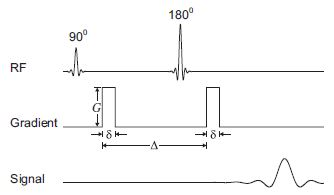

In [1]:
from IPython.display import Image
i = Image(filename='files/stejskal-tanner1965_BergBook_2014.jpg')
i

- if particles remain stationary, the MR signal is not modified by the gradient
- if particles diffuse along **x** during the diffusion time $\Delta$, a ***signal attenuation*** is observed compared to the signal without any gradient (G = 0).

Measured signal (S) attenuated compared to the signal obtained without diffusion weighting.

Signal attenuation (SA): $SA= S/S_0=e^{-b.ADC}$
where b is called the b-value and depends on gradient intensity and diffusion time. b determines the diffusion weighting of the acquisition.

higher b-value → more diffusion contrast

<a id='diffusionmrsignalspatialscales'></a>  <a href='#tableofcontents'>table of contents</a>

## Exercise 1. Diffusion MR signal and spatial scales
In practice: 
The apparent diffusion coefficient of pure water at $20°$ is about $2.4$ $\mu m^2$/ms.
The acquisition time between the two gradient applications is about $50ms$.

- What can you say about the displacements we are looking at ? 

In [2]:
#you can do some python manipulation here

Help: example of some numeric manipulations in python:

In [ ]:
a = 3 # Definition of a variable 'a' of value '3'
print a # print the value of a in the output
b = a * 2 # definition of a new variable 'b' of value : the value of 'a' multiplied by 2
c = 10**-3 # the value of the variable 'c' is 10 power -3 (= 0.001)

#square root:
import numpy as np # Python package for handling arrays and numeric manipulations in python
print np.sqrt(4)

<a id='manipulatediffusiondata'></a>  <a href='#tableofcontents'>table of contents</a>

# 2. Familiarize yourself with diffusion data

#### GOALS : 

- to become familiar with manipulation and visualization of diffusion MR images in  python
- to understand diffusion phenomenon, diffusion in brain tissues and the consequences on diffusion MR signal

## <a id='diffusionMRscannerdata'></a> a. Diffusion MR scanner data 

### After the MR acquisition, a typical diffusion dataset is composed of :

- a data file : it is a 4D image containing diffusion MR volumes for different diffusion-weightings (b-values) and orientations

- a bvals file : it is a text file containing the b-value associated with each diffusion orientation

- a bvecs file : contains the gradient directions associated with each diffusion orientation. Each direction is a
vector of 3 dimensions indicating gradient direction in the 3 spatial directions x, y, and z.

<a href='#tableofcontents'>table of contents</a>

### Let's look at some diffusion data in python ! :

The data are in "~/BME_DWMRI/data/fsl_ftd1/subj1" (same dataset as exercise 2.).
The following code defines data1_dirname which holds this directory.
Please execute it in order to define this directory in python:

In [ ]:
import numpy as np # Python package for handling arrays
import os # to have access to commands of the operating system
from os.path import expanduser, join
home = expanduser('~')
print home
data1_dirname = join(home,'BME_DWMRI','data','fsl_fdt1','subj1')
print data1_dirname

Let's have a look at what's in the dataset for subject 1 :

In [ ]:
print os.listdir(data1_dirname)

Here the complete filenames of the three files we are interested in :

In [ ]:
dwi_fname = join(data1_dirname,'data.nii.gz')
print dwi_fname
bvecs_fname = join(data1_dirname ,'bvecs')
print bvecs_fname
bvals_fname = join(data1_dirname,'bvals')
print bvals_fname

The first file is in [nifti](http://nifti.nimh.nih.gov/) format, a standard neuroimaging format widely used in the neuroscientific community.

It contains an image (an array of numbers) and some metadata.

The [nibabel](http://nipy.org/nibabel/) module enables us to read this kind of neuroimaging-specific format :

In [ ]:
import nibabel as nib
img = nib.load(dwi_fname)
data = img.get_data()

You can check the type of the 'data' object and its shape by doing :

In [ ]:
print "data type : ", type(data)
print "data shape : ", data.shape

'data' is a 4D array where the first three dimensions are the x, y, z coordinates and the last the number of acquired volumes.

Exemple of metadata :
The dimensions in mm of each voxel (element of volume) can be check like this :

In [ ]:
print(img.header.get_zooms()[:3])

In [ ]:
%matplotlib notebook

You can then load the b-value and bvecs files using [dipy](http://nipy.org/dipy/index.html), a python module dedicated to diffusion MRI analysis :

In [ ]:
# Looking at diffusion weighting
from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(bvals_fname, bvecs_fname)
import matplotlib.pyplot as plt # To make 2D plots
fig, ax = plt.subplots()
ax.plot(bvals, 'bo')
plt.show()

In [ ]:
# Extract first volume (b=0)
from nilearn import image
print img.shape
first_b0_volume = image.index_img(img, 0)
print(first_b0_volume.shape)

In [ ]:
# Visualization of the first volume (b=0) using nilearn
from nilearn import plotting
plotting.plot_img(first_b0_volume, colorbar=True, cmap='gray', 
                  black_bg=True, vmin=-112, vmax=3139)
plotting.plot_img(first_b0_volume, colorbar=True, cmap='gray', 
                  black_bg=True, display_mode='z', 
                  vmin=-112, vmax=3139)
plotting.plot_img(first_b0_volume, colorbar=True, cmap='gray', 
                  black_bg=True, display_mode='y', 
                  vmin=-112, vmax=3139)
plotting.show()

You can extract a slice by doing:

In [ ]:
slice_data = data[:, :, 32,:]
print slice_data.shape

You can visualize the corresponding slice in the first volume using [matplotlib](http://matplotlib.org/), in the following way :

In [ ]:
plt.figure()
plt.imshow(slice_data[:,:,0].T, cmap='gray', origin= 'lower', vmin=-112, vmax=2000)
plt.show()

You can visualize the slice in the first and second volumes simultaneously in the following way :

In [ ]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(slice_data[:,:,0].T, cmap='gray', origin= 'lower')
plt.subplot(1,2,2)
plt.imshow(slice_data[:,:,1].T, cmap='gray', origin= 'lower')
plt.show()

What can you say about the signal intensities ?

  * Can you describe the differences between these two images ? (colorpalette: increasing signal values from black to white)
In the brain ventricles for example, where the diffusion can be considered as free ? 

- In the white matter, what do you remark ? Is it consistent with what is observed in the ventricles ? And is it normal according to signal values ? How could it be explained ?

(help: you can take a look at the maximum and minimum value of the slice by doing : "slice.max()" or "slice.min(). You can also take a look at the help of the "plt.imshow" function using tab completion)

### Help on a python function

In [ ]:
help(plt.imshow)

By default, the displayed images are normalised between 0 and 1... !

In [ ]:
plt.figure()
plt.subplot(1,2,1)
dir1_min, dir1_max = (slice_data[:,:,1].min(), slice_data[:,:,1].max())
plt.imshow(slice_data[:,:,0].T, cmap='gray', origin= 'lower',vmin= dir1_min, vmax= dir1_max)
plt.subplot(1,2,2)
plt.imshow(slice_data[:,:,1].T, cmap='gray', origin= 'lower',vmin= dir1_min, vmax= dir1_max)

## <a id='manipulatediffusiondatapython'></a> b. Diffusion MR signal depends on brain tissue

### Exercise 2. 
In this exercise, we are going to 
1. visualize the MR signal in different tissues :
  * the white matter : by looking at a major fiber tract, the corpus callosum which connects the two cerebral hemispheres
  * the cerebro spinal fluid
  * the gray matter
2. describe and explain the difference between these voxels in term of diffusion signal.

Here are the coordinates of the voxels of interests I selected for you :

In [ ]:
# Points of interest:
points = np.array([[48,38], [45, 60], [20, 23]])
labels = ['cc', 'csf', 'gm']
# cc means corpus callosum
# csf cerebro spinal fluid
# gm gray matter
colors = ['red', 'green', 'pink']

You can check if the voxels of interest are well located by executing this code :

In [ ]:
fig, ax = plt.subplots()
ax.imshow(slice_data[:,:,0].T, cmap='gray', origin= 'lower', vmin=-112, vmax=2000)

for i in xrange(3): # to iterate on each element of 'points', 'labels' and 'colors'
    x = points[i, 0] # for i=0: x coordinate of corpus callosum voxel = 48
    y = points[i, 1] # for i=0: y coordinate of corpus callosum voxel = 38
    label = labels[i] # for i=0: label of corpus callosum voxel in the 'labels' list: = 'cc'
    label_color = colors[i] # for i=0: color associated to corpus callosum voxel in the 'colors' list: = 'red'
    print 'i:', i, 'x:', x, ', y:', y, ', label:', label

    ax.plot(x, y, 'r+', linewidth=5, color=label_color)

    plt.annotate(
            label,
            xy=(x, y), xytext=(-5, 5),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc=label_color, alpha=0.5))

plt.show()

You can plot the MR signal of each point of interest by executing this code : 

In [ ]:
# Plot profiles:
fig, ax = plt.subplots()
i = 0
for i in xrange(3):
    x = points[i, 0]
    y = points[i, 1]
    point_label = labels[i]
    point_color = colors[i]
    print 'x:', x, ', y:', y, ', label:', point_label
    ax.plot(slice_data[x,y], point_color)
    
ax.legend(labels)

plt.show()


In [ ]:
# Plot dwi profiles:
fig, ax = plt.subplots()
i = 0
for i in xrange(3):
    x = points[i, 0]
    y = points[i, 1]
    point_label = labels[i]
    point_color = colors[i]
    print 'x:', x, ', y:', y, ', label:', point_label
    ax.plot(slice_data[x,y, bvals!=0], point_color)
    
ax.legend(labels)

plt.show()

### QUESTIONS:
Describe and explain the difference between these voxels in term of diffusion signal :

1. Which tissue has the most signal attenuation ? Could you explain why ?
2. Compute for each tissue, the standard deviation of the diffusion signal (within diffusion weighted volumes only). 
3. What can you say about the variations of the MR signal according to diffusion weighting directions for each tissue (WM, GM, and CSF). 
4. Can you explain why ?

Answer below.

<a id='diffusionmrsignal'></a>  <a href='#tableofcontents'>table of contents</a>

## <a id='diffusiondirection'></a> c. Diffusion weighting directions and fiber tract orientation

### Exercice 3. 

### Reminder : After the MR acquisition, a typical diffusion dataset is composed of

- a dwidata file : it is a 4D image containing diffusion MR volumes for different diffusion-weights and orientations

- a bvals file : it is a text file containing the b-value associated with each diffusion orientation

- bvecs file : contains the gradient directions associated with each diffusion orientation. Each direction is a
vector of 3 dimensions indicating gradient direction in the 3 spatial directions x, y, and z.

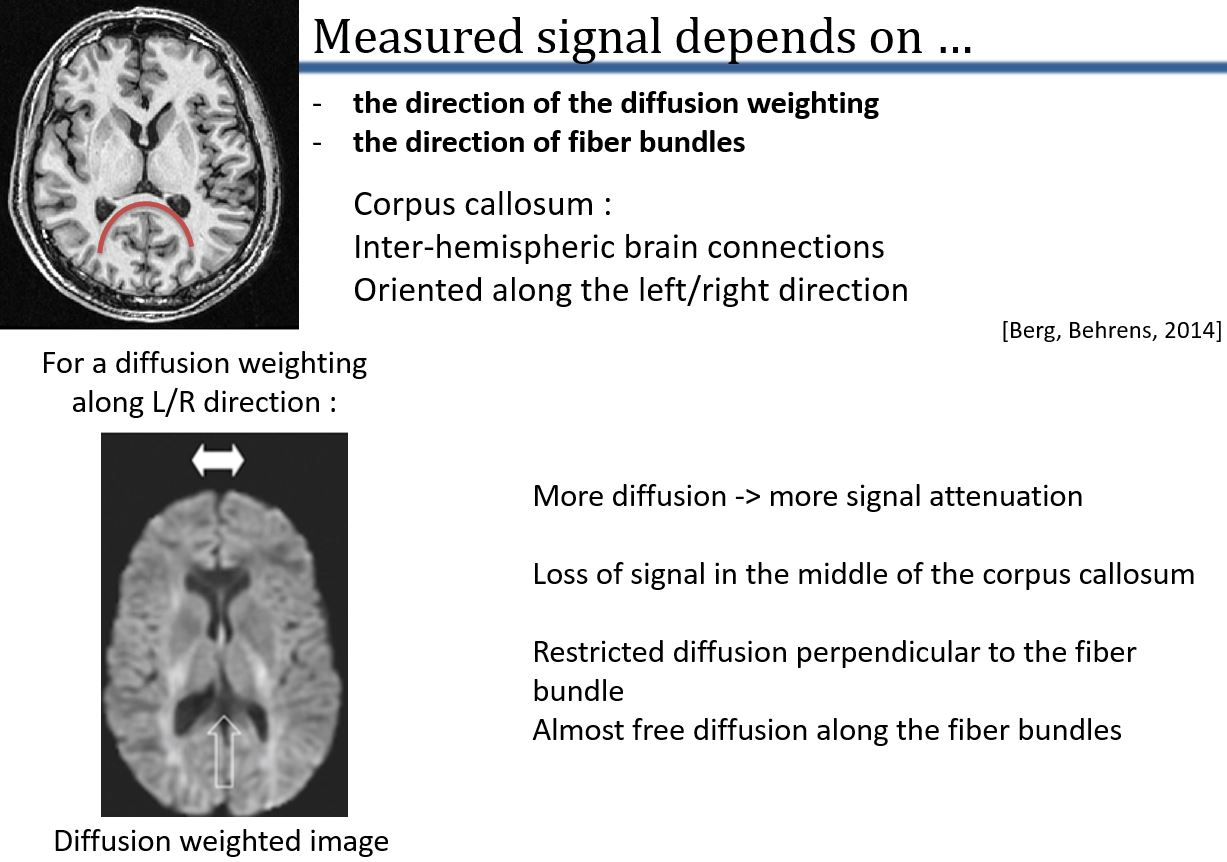

In [3]:
from IPython.display import Image
i = Image(filename='files/diffusion_mr_signal.jpg', width=600)
i

In [ ]:
print bvecs[:10]

### QUESTIONS :
1. Using `plt.plot` function, plot the corpus callosum diffusion profile (take voxel [48, 38, 32] in 3D coordinates, corresponding to voxel [48, 38] of the 33th slice, and use the data in 'data' object)
2. Identify the volume in which the signal is the most attenuated. (Help: use `np.argmin` function)
3. What can you say about the diffusion weighting direction associated to this volume (look at `bvecs` values). What is the direction ? (left/right, superiori/inferior or anterior/posterior?)
3. Can you explain why ?
4. Do the same thing with another voxel of the corpus callosum (3D coordinates = [48, 40, 32]).
  1. Report the index of the acquisition volume for which the MR signal in this voxel is minimum
  2. Print the associated diffusion orientation (in bvecs)
  3. What can you say about the orientation of the fiber tract in that voxel ? 
  4. Do you think the voxel is really in the corpus callosum ? (you can check this by plotting the voxel point of interest on the acquisition volume you found or on the first acquisition volume like in the beginning of this exercise)


Answer below

<a href='#tableofcontents'>table of contents</a>

## <a id='newdiffusiondatasetexploration'></a> 4. Explore a new diffusion dataset

### Exercice 4

Load the Sherbrooke data set of dipy located in '~/BME_DWMRI/data/sherbrooke_3shell'

- Describe this dataset (dimensions, number of orientations, b-values, spatial resolution). 

- Visualize this dataset (plot different acquisition volumes). 

- What can you say about the relation between the signal-to-noise ratio and the b-value ? Try to explain your observations thanks to diffusion theory.

Please answer below by inserting "code cells" when using python or "markdown cells" for text

## <a id='localmodeling'></a>  5. Local modeling of the diffusion phenomenon

Exemple of local modeling: the diffusion tensor model -> slide

## <a id='localmodelingusingdipy'></a>  Exercise 5. Local Modeling using dipy

### GOALS : 

- to familiarize yourself with dipy and diffusion tensor model

- to apprehend the drawbacks of diffusion tensor model 

- to use another local modeling and understand the future impact of both models on the following tractography results

### <a id='dtimodeldipy'></a>  a. Diffusion tensor model

In the next cell you have a step-by-step example of fitting a diffusion tensor model to experimental data and visualizing the results.
- Do you identify the different steps ? (Add comments to the following code to indicate the different steps)
- Look at the image generated by this python script (or in github in '~/examples/dipy_tensor_result.png'). Is it consistent with the underlying brain anatomy ?

(help: the RGB map (color superimposed on the tensor model visualization) can help you determining the directions of the fiber bundles)

Please answer here

In [ ]:
# for numerical computation:
import numpy as np
# for loading imaging datasets
import nibabel as nib
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
# for reconstruction with the diffusion tensor model
import dipy.reconst.dti as dti
from dipy.reconst.dti import fractional_anisotropy, color_fa
from os.path import expanduser, join

home = expanduser('~')
standfordhardi_dirname = join(home,'BME_DWMRI','data','stanford_hardi')
fdwi = join(standfordhardi_dirname,'HARDI150.nii.gz')
fbval = join(standfordhardi_dirname, 'HARDI150.bval')
fbvec = join(standfordhardi_dirname,'HARDI150.bvec')

img = nib.load(fdwi)
data = img.get_data()

print(data.shape)
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)
gtab = gradient_table(bvals, bvecs)

print('data.shape (%d, %d, %d, %d)' % data.shape)

data_small = data[20:50, 55:85, 38:39]

tenmodel = dti.TensorModel(gtab)
tenfit = tenmodel.fit(data_small)

os.chdir(join(home,'BME_DWMRI','examples'))

FA = fractional_anisotropy(tenfit.evals)

FA[np.isnan(FA)] = 0

fa_img = nib.Nifti1Image(FA.astype(np.float32), img.affine)
nib.save(fa_img, 'tensor_fa.nii.gz')

evecs_img = nib.Nifti1Image(tenfit.evecs.astype(np.float32), img.affine)
nib.save(evecs_img, 'tensor_evecs.nii.gz')

MD1 = dti.mean_diffusivity(tenfit.evals)
nib.save(nib.Nifti1Image(MD1.astype(np.float32), img.affine), 'tensors_md.nii.gz')

FA = np.clip(FA, 0, 1)
RGB = color_fa(FA, tenfit.evecs)
nib.save(nib.Nifti1Image(np.array(255 * RGB, 'uint8'), img.affine), 'tensor_rgb.nii.gz')

from dipy.data import get_sphere
sphere = get_sphere('symmetric724')

from dipy.viz import fvtk
ren = fvtk.ren()
evals = tenfit.evals
evecs = tenfit.evecs

cfa = RGB
cfa /= RGB.max()
fvtk.add(ren, fvtk.tensor(evals, evecs, cfa, sphere))
fvtk.record(ren, n_frames=1, out_path='dipy_tensor_result.png', size=(600, 600))

### <a id='sphericalharmonicmodeldipy'></a>  b. Spherical harmonic model

- Run the following python code. This will apply another model (the spherical harmonic model) to the diffusion data in order to estimate the fiberbundles orientation.
- Compare both results (any differences ? Where ? Interpretation ?)
- Remarks?

Please answer here

In [ ]:
import dipy.reconst.csdeconv as csd

In [ ]:
response, ratio = csd.auto_response(gtab, data, roi_radius=10, fa_thr=0.7)
csd_model = csd.ConstrainedSphericalDeconvModel(gtab, response, sh_order=8)

In [ ]:
csd_fit = csd_model.fit(data_small)

In [ ]:
from dipy.data import get_sphere
sphere = get_sphere('symmetric724')
csd_odf = csd_fit.odf(sphere)
csd_odf.shape

In [ ]:
from dipy.viz import fvtk
ren = fvtk.ren()
fodf_spheres = fvtk.sphere_funcs(csd_odf, sphere, scale=1.3, norm=False)
fvtk.add(ren, fodf_spheres)
print('Saving illustration as csd_odfs.png')
fvtk.record(ren, out_path='dipy_csd_result.png', size=(600, 600))

<a href='#tableofcontents'>table of contents</a>

## <a id='tractographybonusdipy'></a>  5. Tractography

- Read and execute the following tractography script. 
- What kind of model is used in this script ?

In [ ]:
# for numerical computation:
import numpy as np
# for loading imaging datasets
import nibabel as nib
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
# for reconstruction with the diffusion tensor model
import dipy.reconst.dti as dti
from dipy.reconst.dti import fractional_anisotropy, color_fa
#for segmentation
from dipy.segment.mask import median_otsu

In [ ]:
print('data.shape (%d, %d, %d, %d)' % data.shape)


In [ ]:
#######################################
# Brain segmentation
#######################################
maskdata, mask = median_otsu(data, 3, 1, False,
                             vol_idx=range(10, 50), dilate=2)

In [ ]:
#######################################
# Diffusion tensor model
#######################################
tenmodel = dti.TensorModel(gtab)
tenfit = tenmodel.fit(maskdata)

In [ ]:
#######################################
# Create diffusion maps
#######################################

print('Computing anisotropy measures (FA, MD, RGB)')
FA = fractional_anisotropy(tenfit.evals)

FA[np.isnan(FA)] = 0

fa_img = nib.Nifti1Image(FA.astype(np.float32), img.affine)
nib.save(fa_img, 'tensor_fa_vol.nii.gz')

evecs_img = nib.Nifti1Image(tenfit.evecs.astype(np.float32), img.affine)
nib.save(evecs_img, 'tensor_evecs_vol.nii.gz')

In [ ]:
#######################################
# Preprocessings
#######################################

from dipy.data import get_sphere

sphere = get_sphere('symmetric724')

from dipy.reconst.dti import quantize_evecs

evecs = tenfit.evecs
peak_indices = quantize_evecs(evecs, sphere.vertices)


In [ ]:
#######################################
# Tracking
#######################################

from dipy.tracking.eudx import EuDX

eu = EuDX(FA.astype('f8'), peak_indices, seeds=50000, odf_vertices = sphere.vertices, a_low=0.2)

tensor_streamlines = [streamline for streamline in eu]

hdr = nib.trackvis.empty_header()
hdr['voxel_size'] = fa_img.header.get_zooms()[:3]
hdr['voxel_order'] = 'LAS'
hdr['dim'] = FA.shape

tensor_streamlines_trk = ((sl, None, None) for sl in tensor_streamlines)

ten_sl_fname = 'tensor_streamlines.trk'
nib.trackvis.write(ten_sl_fname, tensor_streamlines_trk, hdr, points_space='voxel')


In [ ]:
#######################################
# Visualization
#######################################

from dipy.viz import fvtk

ren = fvtk.ren()
from dipy.viz.colormap import line_colors
fvtk.add(ren, fvtk.streamtube(tensor_streamlines, line_colors(tensor_streamlines)))

print('Saving illustration as tensor_tracks.png')

ren.SetBackground(1, 1, 1)
#fvtk.show(ren)
fvtk.record(ren, n_frames=1, out_path='tensor_tracks.png', size=(600, 600))

- Following an online tutorial on dipy, try to apply tractography to the other diffusion model.

In [ ]:
from IPython.display import HTML
HTML('<iframe src=http://nipy.org/dipy/examples_built/tracking_quick_start.html#example-tracking-quick-start?useformat=mobile width=700 height=350></iframe>')

Remarks ?

<a href='#tableofcontents'>table of contents</a>

# <a id='bonus'></a>   BONUS

## <a id='preprocessings'></a> B1. Preprocessings : Correction for susceptibility-induced artifacts 

### GOALS :

- to be aware of susceptibility-induced artifacts present in Echo Planar Imaging (MR sequence used for diffusion MRI and functional MRI)

- to know what is necessary to correct these artifacts  :
 - a specific MR acquisition
 - an appropriate post-processing method (*topup* in FSL)

## <a id='preprocessingsvisu'></a>   Visualisation of the artifacts

Have a look at "b0_PA.nii.gz" and "b0_AP.nii.gz" images (in "~/BME_DWMRI/data/sainte-anne_preproc") using fslview.

- Compare both images
- Remarks?
- Do you have any hypothesis about what you are seeing ?

Please answer here

The solution ? TOPUP method in FSL : 

The distorsions you saw are induced by the "susceptibility effect". Indeed, the subject head have an influence on the static magnetic field $B_0$, and causes local changes of this static field. 
As in MRI, the coordinates of the brain elements of volume are coded by a magnetic field gradient (linear changes along a direction), the susceptibility-induced changes move some brain areas and cause distortions. 
In order to get rid of these distortions, one solution is to acquire two volumes with opposite coordinates direction (opposite gradient along Y here).

### CONCLUSION
- Be careful, MRI signal can be noisy and can have big spatial distortions !!
- a specific set up of the MR acquisition is important in EPI (sequence used in functional and diffusion MRI) in order to correct the distorsions. 

BEFORE the MR acquisition it is important to look at the possible image processing methods available to correct signal artifacts and to know what are the requirements of such methods (additionnal MR sequence, recording of additional information during the usual sequence...)

## <a id='brainsegmentation'></a> B2. Brain segmentation and diffusion weighted imaging

In the following, we will :
  * apply a segmentation method (median_otsu of dipy) to segment the brain volume based on diffusion MRI data
  * apply a clustering algorithm to diffusion profiles in order to segment the brain tissues...

In [ ]:
import numpy as np # Python package for handling arrays
import os # to have access to commands of the operating system
from os.path import expanduser, join
home = expanduser('~')
print home
data1_dirname = join(home,'BME_DWMRI','data','fsl_fdt1','subj1')
print data1_dirname

In [ ]:
print os.listdir(data1_dirname)

In [ ]:
dwi_fname = join(data1_dirname,'data.nii.gz')
print dwi_fname
bvecs_fname = join(data1_dirname ,'bvecs')
print bvecs_fname
bvals_fname = join(data1_dirname,'bvals')
print bvals_fname

In [ ]:
img = nib.load(dwi_fname)
data = img.get_data()

In [ ]:
# Brain segmentation with median_otsu
from dipy.segment.mask import median_otsu
segmented_data, mask = median_otsu(data, median_radius=2, numpass=2) #advised in dipy tutorial

In [ ]:
print 'segmented_data shape:', segmented_data.shape
print 'mask shape:', mask.shape

Saving the segmentation results is very easy using nibabel. We need the segmented_data, and the binary mask volumes. The affine matrix which transform the image’s coordinates to the world coordinates is also needed. Here, we choose to save both images in float32.

In [ ]:
segmented_img = nib.Nifti1Image(segmented_data.astype(np.float32), img.affine)
binary_mask_img = nib.Nifti1Image(mask.astype(np.float32), img.affine)            

In [ ]:
# Visualization of the first masked volume
first_b0_segmented_volume = image.index_img(segmented_img, 0)
print(first_b0_segmented_volume.shape)
plotting.plot_img(first_b0_volume, colorbar=True, cmap='gray', 
                  black_bg=True, display_mode='z', 
                  vmin=-112, vmax=3139)
plotting.plot_img(first_b0_segmented_volume, colorbar=True, cmap='gray', 
                  black_bg=True, display_mode='z', 
                  vmin=-112, vmax=3139,
                  cut_coords=(14, 26, 36, 44, 54, 64, 74))
plotting.plot_roi(roi_img=binary_mask_img, bg_img=first_b0_volume, display_mode='z',
                  cut_coords=(14, 26, 36, 44, 54, 64, 74))
                  #cut_coords=(-40, -26, -14, 0, 20, 34, 46))
plotting.show()

In [ ]:
help(median_otsu)

In [ ]:
segmented_data, mask = median_otsu(data, median_radius=2, numpass=2, dilate=2)
segmented_img = nib.Nifti1Image(segmented_data.astype(np.float32), img.affine)
binary_mask_img = nib.Nifti1Image(mask.astype(np.float32), img.affine)       
# Visualization of the first masked volume
first_b0_segmented_volume = image.index_img(segmented_img, 0)
plotting.plot_img(first_b0_volume, colorbar=True, cmap='gray', 
                  black_bg=True, display_mode='z', 
                  vmin=-112, vmax=3139)
plotting.plot_img(first_b0_segmented_volume, colorbar=True, cmap='gray', 
                  black_bg=True, display_mode='z', 
                  vmin=-112, vmax=3139,
                  cut_coords=(14, 26, 36, 44, 54, 64, 74))
plotting.plot_roi(roi_img=binary_mask_img, bg_img=first_b0_volume, display_mode='z',
                  cut_coords=(14, 26, 36, 44, 54, 64, 74))
                  #cut_coords=(-40, -26, -14, 0, 20, 34, 46))
                  
plotting.show()

In [ ]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=binary_mask_img)
print img.get_data().shape
obs_data = masker.fit_transform(img)
voxels_profiles = obs_data.T
print obs_data.shape
print voxels_profiles.shape

In [ ]:
# Clustering voxels according to dwi profile:
from sklearn.cluster import k_means
prototypes, labels, _ = k_means(obs_data.T, n_clusters=4)

In [ ]:
prototypes.shape

In [ ]:
import matplotlib
colours =['green', 'blue', 'orange', 'red']

In [ ]:
#plt.plot(prototypes.T)
for i, color in enumerate(colours):
    plt.plot(prototypes[i], color, label=str(i+1))
plt.legend()
plt.show()

In [ ]:
# Find b=0 volumes
plt.plot(bvals, '.')
plt.show()
bvals.shape

In [ ]:
for i, color in enumerate(colours):
    plt.plot(prototypes[i,bvals!=0].T, color, label=str(i+1))
plt.legend()
plt.show()
#help(plt.plot)

In [ ]:
cmap = matplotlib.colors.ListedColormap(colours)

In [ ]:
np.unique(labels)


In [ ]:
# plot label on brain volume
plotting.plot_img(first_b0_segmented_volume, black_bg=True, display_mode='z', 
                  vmin=-112, vmax=3139, cmap='gray', colorbar=True)
plotting.plot_roi(masker.inverse_transform(labels+1), bg_img=first_b0_segmented_volume,
                 cmap=cmap, display_mode='z', cut_coords=(-14, 26, 36, 44, 54, 64, 74))

plotting.show()

In [ ]:
labels_img = masker.inverse_transform(labels+1)
labels_data = labels_img.get_data()
data = img.get_data()
for i, color in enumerate(colours):
    plt.plot(data[labels_data==i+1][0], color, label=str(i+1))
plt.legend()
plt.show()

<a href='#tableofcontents'>table of contents</a>

## <a id='localmodelingbonusfsl'></a>   B3. Local modeling using FSL

In order to reconstruct DTI data with FSL, please have a look at the section 'DTI - fitting diffusion tensor' the FSL tutorial.
Follow the instruction (data are in '~/BME_DWMRI/data/fsl_fdt1/subj1')

In [ ]:
from IPython.display import HTML
HTML('<iframe src=http://fsl.fmrib.ox.ac.uk/fslcourse/lectures/practicals/fdt1/index.html#dtifit?useformat=mobile width=700 height=350></iframe>')

You can put your comments here

## <a id='tractographybonusfsl'></a>   B4. Tractography with FSL

### GOALS:

- to manipulate FSL to perform tractography
- to be aware that a "tract" or a connectivity probability map are only approximations of the real brain fiber bundles.

Data directory for this part: "~/tp/data/fsl_fdt2/subj1.bedpostX"

### EXERCISE 
(extract of FSL practical on Tractography)

#### 1.
Open mean_f1_samples with fslview and find the coordinates of a voxel in the internal capsula. (I will show you). 
Run FtdGUI, with the following parameters: "ProbTrackx" with "single voxel"

- Select "subj1.betpostX" as the Bedpostx directory
- enter the coordinates of the voxel you selected
- choose an output name and press Go
- visualize the results ( FSL tutorial...)
- Remarks ?

#### 2.

Do the same, but with another diffusion modeling provided by FSL (data are in'~/tp_bme/dwi/data/fsl_fdt2/subj1_2fibres.bedpostX'). 

- Load the results using fslview
- Compare both results. 
- Remarks?



Answer here

<a href='#tableofcontents'>table of contents</a>